# Makemore Part 2

In [1]:

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset 

block_size = 3 # context length: how many characters do we take to predict the next one?
X,Y=[],[] # x input to NN, Y labels
for w in words:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)     
        Y.append(ix)
        print(context, ix)
        # this context takes the second character til the end 
        # so always trims off the first character
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

X

emma
[0, 0, 0] 5
[0, 0, 5] 13
[0, 5, 13] 13
[5, 13, 13] 1
[13, 13, 1] 0
olivia
[0, 0, 0] 15
[0, 0, 15] 12
[0, 15, 12] 9
[15, 12, 9] 22
[12, 9, 22] 9
[9, 22, 9] 1
[22, 9, 1] 0
ava
[0, 0, 0] 1
[0, 0, 1] 22
[0, 1, 22] 1
[1, 22, 1] 0
isabella
[0, 0, 0] 9
[0, 0, 9] 19
[0, 9, 19] 1
[9, 19, 1] 2
[19, 1, 2] 5
[1, 2, 5] 12
[2, 5, 12] 12
[5, 12, 12] 1
[12, 12, 1] 0
sophia
[0, 0, 0] 19
[0, 0, 19] 15
[0, 19, 15] 16
[19, 15, 16] 8
[15, 16, 8] 9
[16, 8, 9] 1
[8, 9, 1] 0
charlotte
[0, 0, 0] 3
[0, 0, 3] 8
[0, 3, 8] 1
[3, 8, 1] 18
[8, 1, 18] 12
[1, 18, 12] 15
[18, 12, 15] 20
[12, 15, 20] 20
[15, 20, 20] 5
[20, 20, 5] 0
mia
[0, 0, 0] 13
[0, 0, 13] 9
[0, 13, 9] 1
[13, 9, 1] 0
amelia
[0, 0, 0] 1
[0, 0, 1] 13
[0, 1, 13] 5
[1, 13, 5] 12
[13, 5, 12] 9
[5, 12, 9] 1
[12, 9, 1] 0
harper
[0, 0, 0] 8
[0, 0, 8] 1
[0, 8, 1] 18
[8, 1, 18] 16
[1, 18, 16] 5
[18, 16, 5] 18
[16, 5, 18] 0
evelyn
[0, 0, 0] 5
[0, 0, 5] 22
[0, 5, 22] 5
[5, 22, 5] 12
[22, 5, 12] 25
[5, 12, 25] 14
[12, 25, 14] 0
abigail
[0, 0, 0] 1
[0, 0, 1] 

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [6]:
X.shape, X.dtype, Y.shape, Y.dtype


(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [7]:
C = torch.randn((27, 2))
# each 27 character has 2dimensional embedding

C[5]

tensor([2.8026, 0.2022])

In [8]:
# in previous lecture we took these embeddings and one-hot encodded
f = F.one_hot(torch.tensor(5), num_classes=27).float()

# now we can use the embedding layer multiply by C
f @ C

# first layer of bigger neural net
# weight matrix is C
# encoding into one-hot and feeding into NN

# we'll just use indexing because its much faster
C

tensor([[-0.2581, -1.4775],
        [ 1.6523,  0.5048],
        [-0.3799, -0.3429],
        [-0.0931, -0.2532],
        [ 1.6374,  0.2550],
        [ 2.8026,  0.2022],
        [-0.5221,  0.5775],
        [-1.8126, -0.4809],
        [ 0.0465,  1.6485],
        [ 0.1410,  1.8869],
        [-1.5451,  0.7649],
        [-1.2940, -0.6864],
        [-1.9169,  0.5389],
        [ 0.4468,  1.2155],
        [ 1.3763,  0.9741],
        [-1.3491,  1.2987],
        [ 0.8238, -0.5704],
        [ 0.0725, -0.3420],
        [-0.0402, -0.0326],
        [ 0.8344,  1.1731],
        [ 0.7464, -1.8702],
        [ 1.0016, -0.6747],
        [-0.1899,  0.3379],
        [ 0.1727, -0.0642],
        [-0.9496, -0.3676],
        [-0.7265, -1.1347],
        [-0.6069,  1.0623]])

In [9]:
# how do we simultaneously embed all the characters in index X?
C[[5,6,7]] # equivalent to C[torch.tneosr([5,6,7])] 

# can also index with multi dimensional tensors of integers
C[X]

tensor([[[-0.2581, -1.4775],
         [-0.2581, -1.4775],
         [-0.2581, -1.4775]],

        [[-0.2581, -1.4775],
         [-0.2581, -1.4775],
         [ 2.8026,  0.2022]],

        [[-0.2581, -1.4775],
         [ 2.8026,  0.2022],
         [ 0.4468,  1.2155]],

        ...,

        [[-0.6069,  1.0623],
         [-0.6069,  1.0623],
         [-0.7265, -1.1347]],

        [[-0.6069,  1.0623],
         [-0.7265, -1.1347],
         [-0.6069,  1.0623]],

        [[-0.7265, -1.1347],
         [-0.6069,  1.0623],
         [-0.9496, -0.3676]]])

In [10]:
C[X].shape # 32 words, 3 characters, 2 dimensions

torch.Size([228146, 3, 2])

In [11]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [12]:
W1 = torch.randn((6, 100)) # num inputs is 3*2, because 2 dim embeddings and 3 of them
b1 = torch.randn((100,))

# normally we take embeddings @ W1 + b1
# how do we convert 32 x 3 x 2 into 32 x 6?

# there are many ways in torch
# we can concat a sequence of tensors in a given dimension
# we can concatenate these 3 embeddings for each input

torch.unbind(emb, dim=1) # splits the tensor into 3 tensors along the 1st dimension
torch.cat(torch.unbind(emb, dim=1), dim=1) # concatenates the 3 tensors along

# turns out there are more efficient ways to do this
# e.g. 
a = torch.arange(18)
a

a.view(3,2,3)
# this is extremely efficient.
# there is something called underlying storage in pytorch
a.storage()

# when we call a.view, we manipulate how this 
# 1dim sequence is interpreted to be an n-dimensional tensor
# the storage is identical. but when you call a.view
# the view of this tensor are being manipulated and being changed
# storage offsets, strides and shapes

# read this for more info
# http://blog.ezyang.com/2019/05/pytorch-internals/




/var/folders/qm/x2xlchmx10zbfgr62n01rkcw0000gn/T/ipykernel_33423/2196086589.py:22: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [13]:
emb.shape

emb.view(32, 6)
# the way it gets flattened is that the 2 get 
# stacked up in a row. 

emb.view(32,6) == torch.cat(torch.unbind(emb, dim=1), dim=1)

RuntimeError: shape '[32, 6]' is invalid for input of size 1368876

In [14]:
h = emb.view(-1,6) @ W1 + b1
h.shape

# emb -1 is a wildcard, it will be inferred

torch.cat(torch.unbind(emb, dim=1), dim=1) @ W1 + b1 
# this is much less efficient because it creates new memory

tensor([[-3.3888,  1.2607, -0.3872,  ..., -1.7314, -6.1219, -4.4752],
        [-1.5812,  1.5131,  3.0086,  ..., -0.3919, -2.8768, -1.4238],
        [-0.8682,  2.6296, -2.7329,  ...,  1.6625, -4.4680, -4.1305],
        ...,
        [ 0.4925, -3.6390, -1.9827,  ..., -0.4592,  1.5652,  2.6442],
        [ 3.8081,  0.8233, -4.3244,  ...,  4.5855,  3.5058,  7.5591],
        [-1.3385, -2.4606, -2.8760,  ...,  1.2038, -3.1687, -2.0680]])

In [15]:
h = torch.tanh(h) # now between -1 and 1 becuase of tanh
h.shape

torch.Size([228146, 100])

In [16]:
# ensure broadcasting is happening correctly
b1.shape

# 32, 100
#     100 # creates faake dimension
#  1, 100
# broadcasting aligns on the right
# copies vertically for every one of these rows
# and do an element wise addition. 
# correct things will be happening because htey are
# added to each row of the matrix.


torch.Size([100])

In [17]:
W2 = torch.randn((100, 27))
b2 = torch.randn((27,))

In [18]:
logits = h @ W2 + b2
logits.shape
logits

tensor([[ -4.8521,  -4.4728, -13.0250,  ...,   7.0023,   7.5385,   0.7304],
        [ -5.4321,  -3.5691,  -0.0842,  ...,  10.0999,  12.0399,   2.4762],
        [ -0.7911,  -5.2136,  -6.9314,  ...,   7.0615,  -8.0300,   8.3507],
        ...,
        [ -3.3531,  10.9833,  10.9014,  ...,   3.1404,   8.6008,  -3.5976],
        [  3.8161,  -4.0322,  10.1751,  ...,  -5.2239,  10.3326,  -5.0240],
        [-26.1258,  11.9729,  -6.1146,  ...,   1.3493,  -1.7199,   9.7782]])

In [19]:
counts = logits.exp()
counts

tensor([[7.8121e-03, 1.1415e-02, 2.2046e-06,  ..., 1.0992e+03, 1.8791e+03,
         2.0758e+00],
        [4.3738e-03, 2.8181e-02, 9.1928e-01,  ..., 2.4341e+04, 1.6938e+05,
         1.1897e+01],
        [4.5336e-01, 5.4421e-03, 9.7662e-04,  ..., 1.1662e+03, 3.2556e-04,
         4.2332e+03],
        ...,
        [3.4975e-02, 5.8882e+04, 5.4250e+04,  ..., 2.3112e+01, 5.4361e+03,
         2.7390e-02],
        [4.5427e+01, 1.7735e-02, 2.6242e+04,  ..., 5.3862e-03, 3.0717e+04,
         6.5782e-03],
        [4.5052e-12, 1.5841e+05, 2.2103e-03,  ..., 3.8548e+00, 1.7908e-01,
         1.7645e+04]])

In [63]:
probs = counts / counts.sum(1, keepdims=True)   

In [65]:
probs.shape
probs[0].sum()

tensor(1.)

In [20]:
# index into rows of prob, and pluck out prob assigned to char
loss = -probs[torch.arange(32), Y].log().mean()
loss

NameError: name 'probs' is not defined

In [21]:
# rewrite everything
X # input data
Y # labels
g = torch.Generator().manual_seed(2147483647)
vocab_size = 27
embed_dims = 2
block_size = 3
C = torch.randn((vocab_size,embed_dims), generator=g)
W1 = torch.randn((block_size * embed_dims, 100), generator=g)
b1 = torch.randn((100,))
W2 = torch.randn((100, vocab_size), generator=g)
b2 = torch.randn((vocab_size,), generator=g)
parameters = [C,W1,b1,W2,b2]
print(sum(p.nelement() for p in parameters))

def forward():
    # EMBED
    # for each data, pluck out embeddings
    emb = C[X] 
    # RESHAPE and FIRST HIDDEN
    h1 = torch.tanh(emb.view(-1,6) @ W1 + b1)
    # SECOND HIDDEN
    logits = h1 @ W2 + b2
    # h2.shape
    # EXPONENTIATE
    counts = logits.exp() 
    # counts.shape
    # COMPUTE LOG PROBABILITIES
    probs = counts / counts.sum(dim=1, keepdim=True)
    # probs
    # probs[0].sum()
    # COMPUTE LOSS
    # negative cross entropy (mean loss)
    # index into rows of prob, and pluck out prob assigned to char
    # each row, take Y char, compute log(), take mean of everything
    loss = -probs[torch.arange(counts.shape[0]), Y].log().mean()
    print(loss)

forward()

3481
tensor(20.4146)


In [162]:
# rewrite everything using F.cross_entropy
X # input data
Y # labels
g = torch.Generator().manual_seed(2147483647)
vocab_size = 27
embed_dims = 2
block_size = 3
C = torch.randn((vocab_size,embed_dims), generator=g)
W1 = torch.randn((block_size * embed_dims, 100), generator=g)
b1 = torch.randn((100,))
W2 = torch.randn((100, vocab_size), generator=g)
b2 = torch.randn((vocab_size,), generator=g)
parameters = [C,W1,b1,W2,b2]
print(sum(p.nelement() for p in parameters))

def forward():
    emb = C[X] 
    h1 = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h1 @ W2 + b2
    ce_loss = F.cross_entropy(logits, Y)
    print(ce_loss)
    return ce_loss

forward()

3481
tensor(17.1267)


In [163]:
# why is F.cross_entropy more efficient?
# 1 - pytorch may fuse kernels together
# 2 - will not create intermediate tensors
# 3 - more efficient mathematical expression
# the expression simplifies, so can take a 
# more efficient mathematical form

# F.cross_entropy can also be better behaved
# if logits grow large, because of exp(), 
# easy to get inf, which gives you nan 

# example
logits = torch.tensor([-100, -3, 0, 100])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([0., 0., 0., nan])

In [165]:
counts

tensor([3.7835e-44, 4.9787e-02, 1.0000e+00,        inf])

In [166]:
# the way pytorch solves this 
# you can offset logits by any value
# any offset will produce exact same probabilities
# becuase negative numbers are OK, but negative numbers are not
# pytorch internally calculates the max value and subtract it
# result of this is always well-behaved

logits = torch.tensor([-100, -3, 0, 100]) - 100
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

In [241]:
# RESET
# rewrite everything using F.cross_entropy
X # input data
Y # labels
g = torch.Generator().manual_seed(2147483647)
vocab_size = 27
embed_dims = 2
block_size = 3
C = torch.randn((vocab_size,embed_dims), generator=g)
W1 = torch.randn((block_size * embed_dims, 100), generator=g)
b1 = torch.randn((100,))
W2 = torch.randn((100, vocab_size), generator=g)
b2 = torch.randn((vocab_size,), generator=g)
parameters = [C,W1,b1,W2,b2]

for p in parameters:
    p.requires_grad = True

In [190]:
# use torch.linspace
lre = torch.linspace(-3, 0, 1000)
# this creates 1000 numbers between 0 1
lrs = 10**lre
lrs

# candidate learning rates we want to search over


tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [216]:
# set up neural network
# single batch
# loss doesn't go to zero, but ... predicts multiple values
# so loss can never go to zero
# this is also only a single batch, so 3481 parmaeters
# easy to fit to this batch.

# we want to randomly select a mini batch and forward and update on minibatch
# better to have approximate gradient and take many steps
# than exact gradient with fewer steps
lri = []
lossi = []
for i in range(10000):
    ix = torch.randint(0, X.shape[0], (32,))

    # forward
    emb = C[X[ix]] 
    h1 = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h1 @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss)

    # backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # update, learning rate increases over time
    # keep track of learning rates we use and look at 
    # losses that resulted
    lr = 0.01 # 1e-1 # lrs[i] # decay learning rate 
    for p in parameters:
        p.data += -lr * p.grad
    # lri.append(lre[i])
    # lossi.append(loss.item())

# evaluate loss for all X and Y
emb = C[X]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
print(loss)

tensor(2.3552, grad_fn=<NllLossBackward0>)


tensor(2.4546, grad_fn=<NllLossBackward0>)


In [176]:
torch.randint(0, X.shape[0], (32,))

tensor([143122,  65131,  87243,  50414,  96586, 169864, 227787,  38575, 139400,
         89733,  77957, 128390,  42097,  82744,  83390, 163206,  74067,  31638,
        123188,  30880,  56788, 205484,  26728,  66803,  18731,   7937,  50643,
        194573,  68644, 202556, 167102, 177256])

In [201]:
plt.plot(lri,lossi)

# in this chart, as we increase the learning rate, we started getting unstable.
# a good learning rate looks to be somewhere around -1.0

# this is how you determine a good learning rate

In [22]:
# is this a good model?
# loss may get close to zero by increasing model size
# if you try to evaluate on withheld names, loss can be high
# so standard in the field is to split dataset into three splits
# training, validation, test 
# 80%, 10%, 10%

# 80% used to optimize model params
# 10% used for hyperparams optimization 
# see which ones work best for validation split
# 10% used for evaluating model at end
# every tiem you evaluate your test loss, you're starting to train on test split
# so only allowed to test on test split very few times, otherwise you risk overfitting to it
block_size = 5

# context length: how many characters do we take to predict the next one?
def build_dataset(words):
    X,Y=[],[] # x input to NN, Y labels
    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)     
            Y.append(ix)
            # print(context, ix)
            # this context takes the second character til the end 
            # so always trims off the first character
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

torch.Size([182625, 5]) torch.Size([182625])
torch.Size([22655, 5]) torch.Size([22655])
torch.Size([22866, 5]) torch.Size([22866])


In [329]:
len(words)


32033

In [224]:
n1

25626

In [225]:
n2

28829

In [226]:
n2-n1

3203

In [29]:
# RESET part 2 with training data set
Xtr # input data
Ytr # labels
g = torch.Generator().manual_seed(2147483647)
vocab_size = 27
hidden_layer_size = 300
embed_dims = 10
C = torch.randn((vocab_size,embed_dims), generator=g)
W1 = torch.randn((block_size * embed_dims, hidden_layer_size), generator=g)
b1 = torch.randn((hidden_layer_size,))
W2 = torch.randn((hidden_layer_size, vocab_size), generator=g)
b2 = torch.randn((vocab_size,), generator=g)
parameters = [C,W1,b1,W2,b2]

for p in parameters:
    p.requires_grad = True

print(sum(p.nelement() for p in parameters))

23697


In [30]:
# set up neural network
# single batch
# loss doesn't go to zero, but ... predicts multiple values
# so loss can never go to zero
# this is also only a single batch, so 3481 parmaeters
# easy to fit to this batch.

# we want to randomly select a mini batch and forward and update on minibatch
# better to have approximate gradient and take many steps
# than exact gradient with fewer steps
stepi = []
lossi = []
for i in range(300000):
    ix = torch.randint(0, Xtr.shape[0], (64,))

    # forward
    emb = C[Xtr[ix]] 
    h1 = torch.tanh(emb.view(-1,block_size * embed_dims) @ W1 + b1)
    logits = h1 @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss)

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update, learning rate increases over time
    # keep track of learning rates we use and look at 
    # losses that resulted
    if i > 200000:
        lr = 0.01
    elif i > 100000:
        lr = 0.05 # 1e-1 # lrs[i] # decay learning rate 
    else:
        lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lre[i])
    # lossi.append(loss.item())
    stepi.append(i)
    lossi.append(loss.log10().item())

In [25]:
plt.plot(stepi, lossi)

In [26]:
# evaluate loss for TRAINING SEt
emb = C[Xtr]
h = torch.tanh(emb.view(-1,block_size * embed_dims) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print(loss)

tensor(2.1008, grad_fn=<NllLossBackward0>)


In [27]:
# training and dev loss are about equal
# this means we can scale up the size we are underfitting.

# easiest way to do this is to scale up hidden layers
# evaluate loss for DEV SET
emb = C[Xdev]
h = torch.tanh(emb.view(-1,block_size * embed_dims) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss)

tensor(2.1460, grad_fn=<NllLossBackward0>)


In [ ]:
# starting to overfit after changing
# embedding_size to 10
# loss for training set and validation set start to diverge
# meaning you are overfitting.
# maybe the number of parameters is sufficient then

# the way we can change this
# 1) increase number of letters in input
# 2) change number of parameters
# 3) try different hyperparameters
# 4) change details of optimization
# 5) change learning rate decay
# 6) change batch size

# best loss is 2.2213 so far 


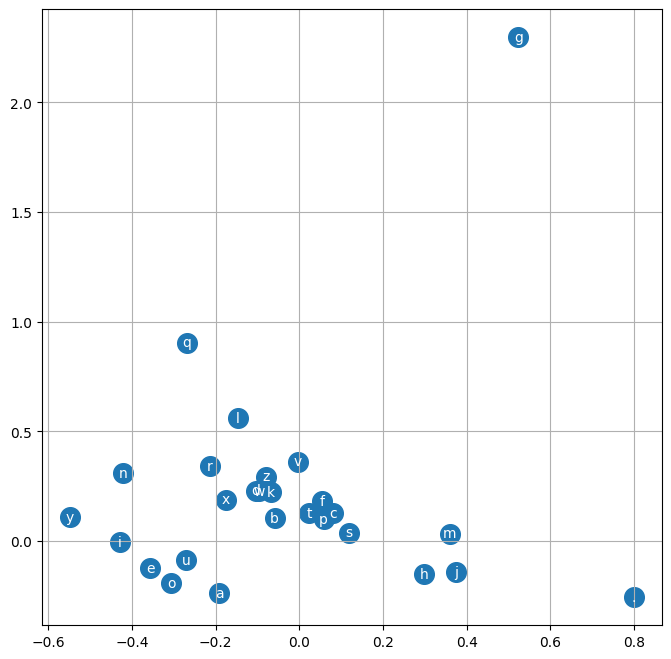

In [ ]:
# let's visualize the embeddings
# maybe this ist he bottleneck for why we can't improve the model past 
# loss = 2.329
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [28]:
# Sample from model

g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])] # (3,block_size, d)
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

carmah.
amelle.
khiim.
shree.
cassley.
kenarone.
famerah.
jareei.
neleaharchaiir.
kaleig.
hallo.
kinder.
juhannix.
alvin.
quintero.
dearyx.
kakhen.
ivran.
edde.
iia.
